# Lesson 1 Assignment - EnergyLoads
## Author - Michael Rojas 

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

Read in the data

In [13]:
energy = pd.read_csv(fileName)

# Get a feel for the general layout of the data

In [14]:
energy.shape

(768, 10)

In [15]:
energy.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [16]:
energy.head(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [17]:
energy.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [18]:
energy.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [19]:
print(energy.Orientation.nunique())
print(energy['Glazing Area Distribution'].nunique())

4
6


Convert 'Orientation' and 'Glazing Area Distribution' into categorical datatypes

In [20]:
energy['Orientation'] = energy['Orientation'].astype('category')
energy['Glazing Area Distribution'] = energy['Glazing Area Distribution'].astype('category')

In [21]:
energy['Orientation'].value_counts()

5    192
4    192
3    192
2    192
Name: Orientation, dtype: int64

In [22]:
energy['Glazing Area Distribution'].value_counts()

5    144
4    144
3    144
2    144
1    144
0     48
Name: Glazing Area Distribution, dtype: int64

In [23]:
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Look at different visualizations

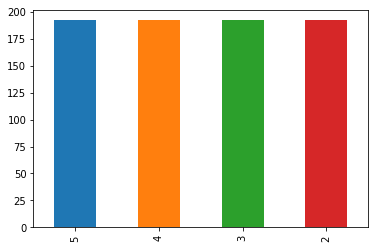

In [28]:
energy['Orientation'].value_counts().plot.bar()

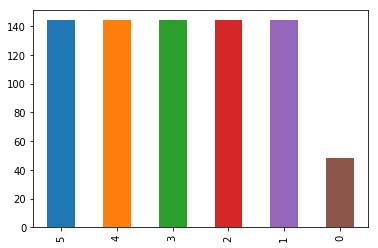

In [30]:
energy['Glazing Area Distribution'].value_counts().plot.bar()

In [52]:
cols_to_investigate = ['Relative Compactness', 'Surface Area',
                       'Wall Area', 'Roof Area','Overall Height',
                       'Glazing Area']

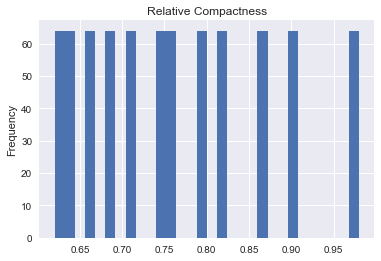

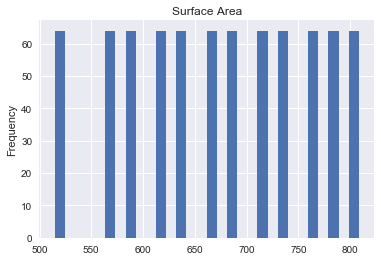

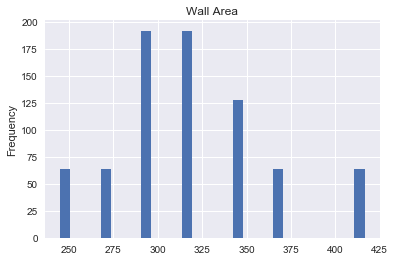

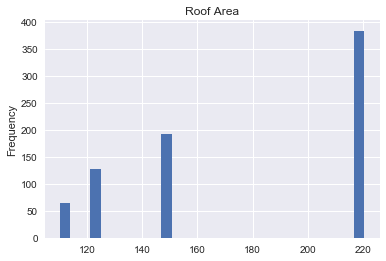

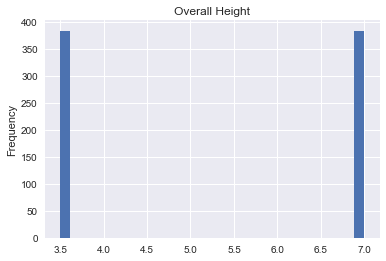

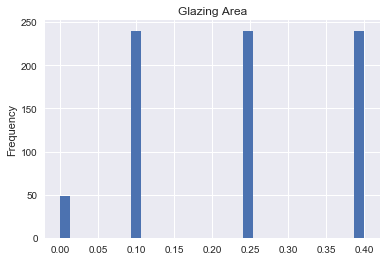

In [56]:
for c in cols_to_investigate:
    energy[c].plot.hist(bins=30)
    plt.title(c)
    plt.show()

# Plots on the Heating and Cooling loads

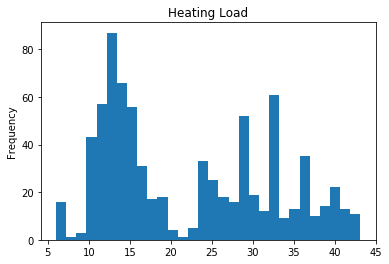

In [34]:
energy['Heating Load'].plot.hist(bins=30)
plt.title('Heating Load')

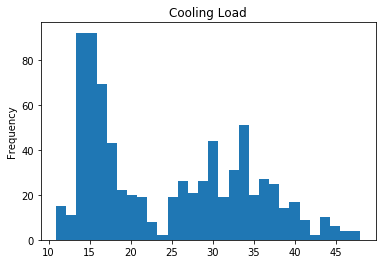

In [35]:
energy['Cooling Load'].plot.hist(bins=30)
plt.title('Cooling Load')

(0, 50)

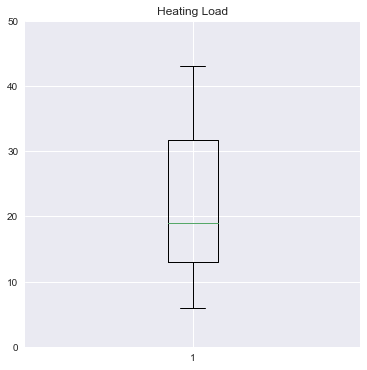

In [41]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.boxplot(energy['Heating Load'])
plt.title('Heating Load')
plt.ylim(0,50)

No outiers and median is a bit smaller than 20

(0, 50)

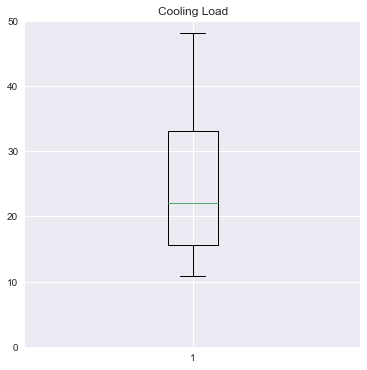

In [42]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.boxplot(energy['Cooling Load'])
plt.title('Cooling Load')
plt.ylim(0,50)

No outiers and median value above 20

(0, 50)

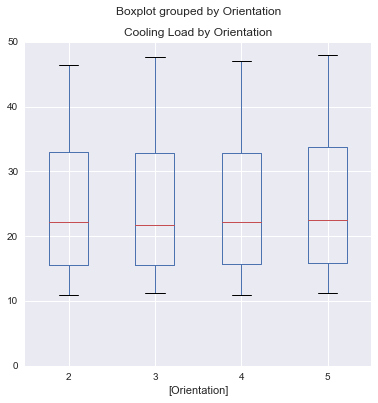

In [45]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Cooling Load', 'Orientation']].boxplot(by='Orientation', ax=ax)
plt.title('Cooling Load by Orientation')
plt.ylim(0,50)

(0, 50)

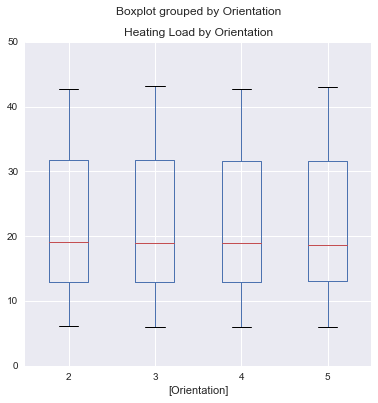

In [46]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Heating Load', 'Orientation']].boxplot(by='Orientation', ax=ax)
plt.title('Heating Load by Orientation')
plt.ylim(0,50)

(0, 50)

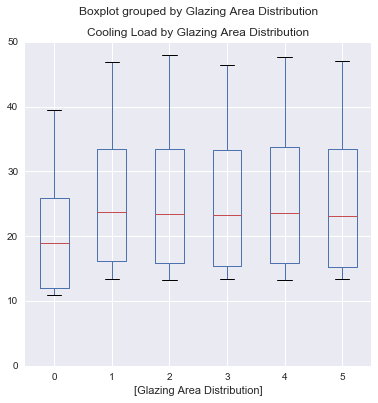

In [49]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Cooling Load', 'Glazing Area Distribution']].boxplot(by='Glazing Area Distribution', ax=ax)
plt.title('Cooling Load by Glazing Area Distribution')
plt.ylim(0,50)

(0, 50)

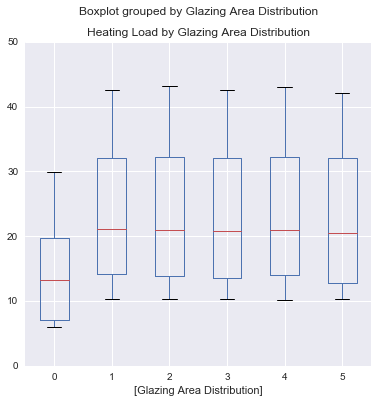

In [50]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Heating Load', 'Glazing Area Distribution']].boxplot(by='Glazing Area Distribution', ax=ax)
plt.title('Heating Load by Glazing Area Distribution')
plt.ylim(0,50)

(0, 50)

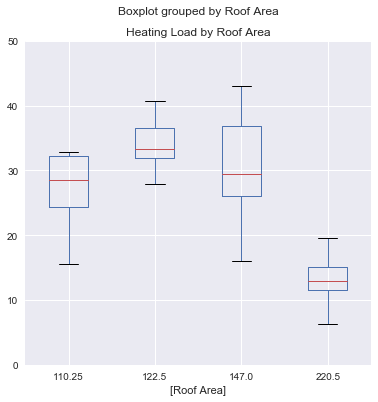

In [54]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Heating Load', 'Roof Area']].boxplot(by='Roof Area', ax=ax)
plt.title('Heating Load by Roof Area')
plt.ylim(0,50)

(0, 50)

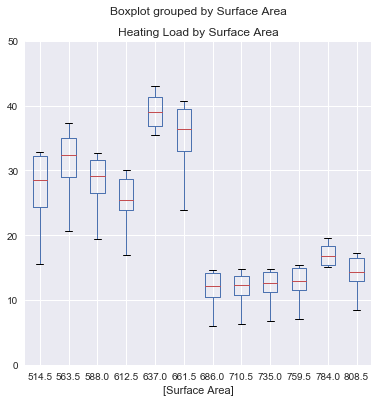

In [57]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Heating Load', 'Surface Area']].boxplot(by='Surface Area', ax=ax)
plt.title('Heating Load by Surface Area')
plt.ylim(0,50)

(0, 50)

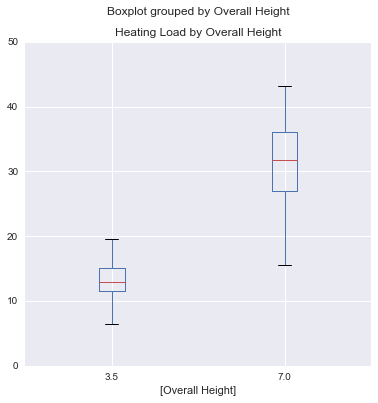

In [58]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
energy[['Heating Load', 'Overall Height']].boxplot(by='Overall Height', ax=ax)
plt.title('Heating Load by Overall Height')
plt.ylim(0,50)

In [43]:
energy.head(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [ ]:
sns.violinplot(data=energy, x=)